In [160]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

def plt_show(image) :
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

face_mesh =  mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(1)
for i in range(10) :
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        break;
        continue
cap.release()

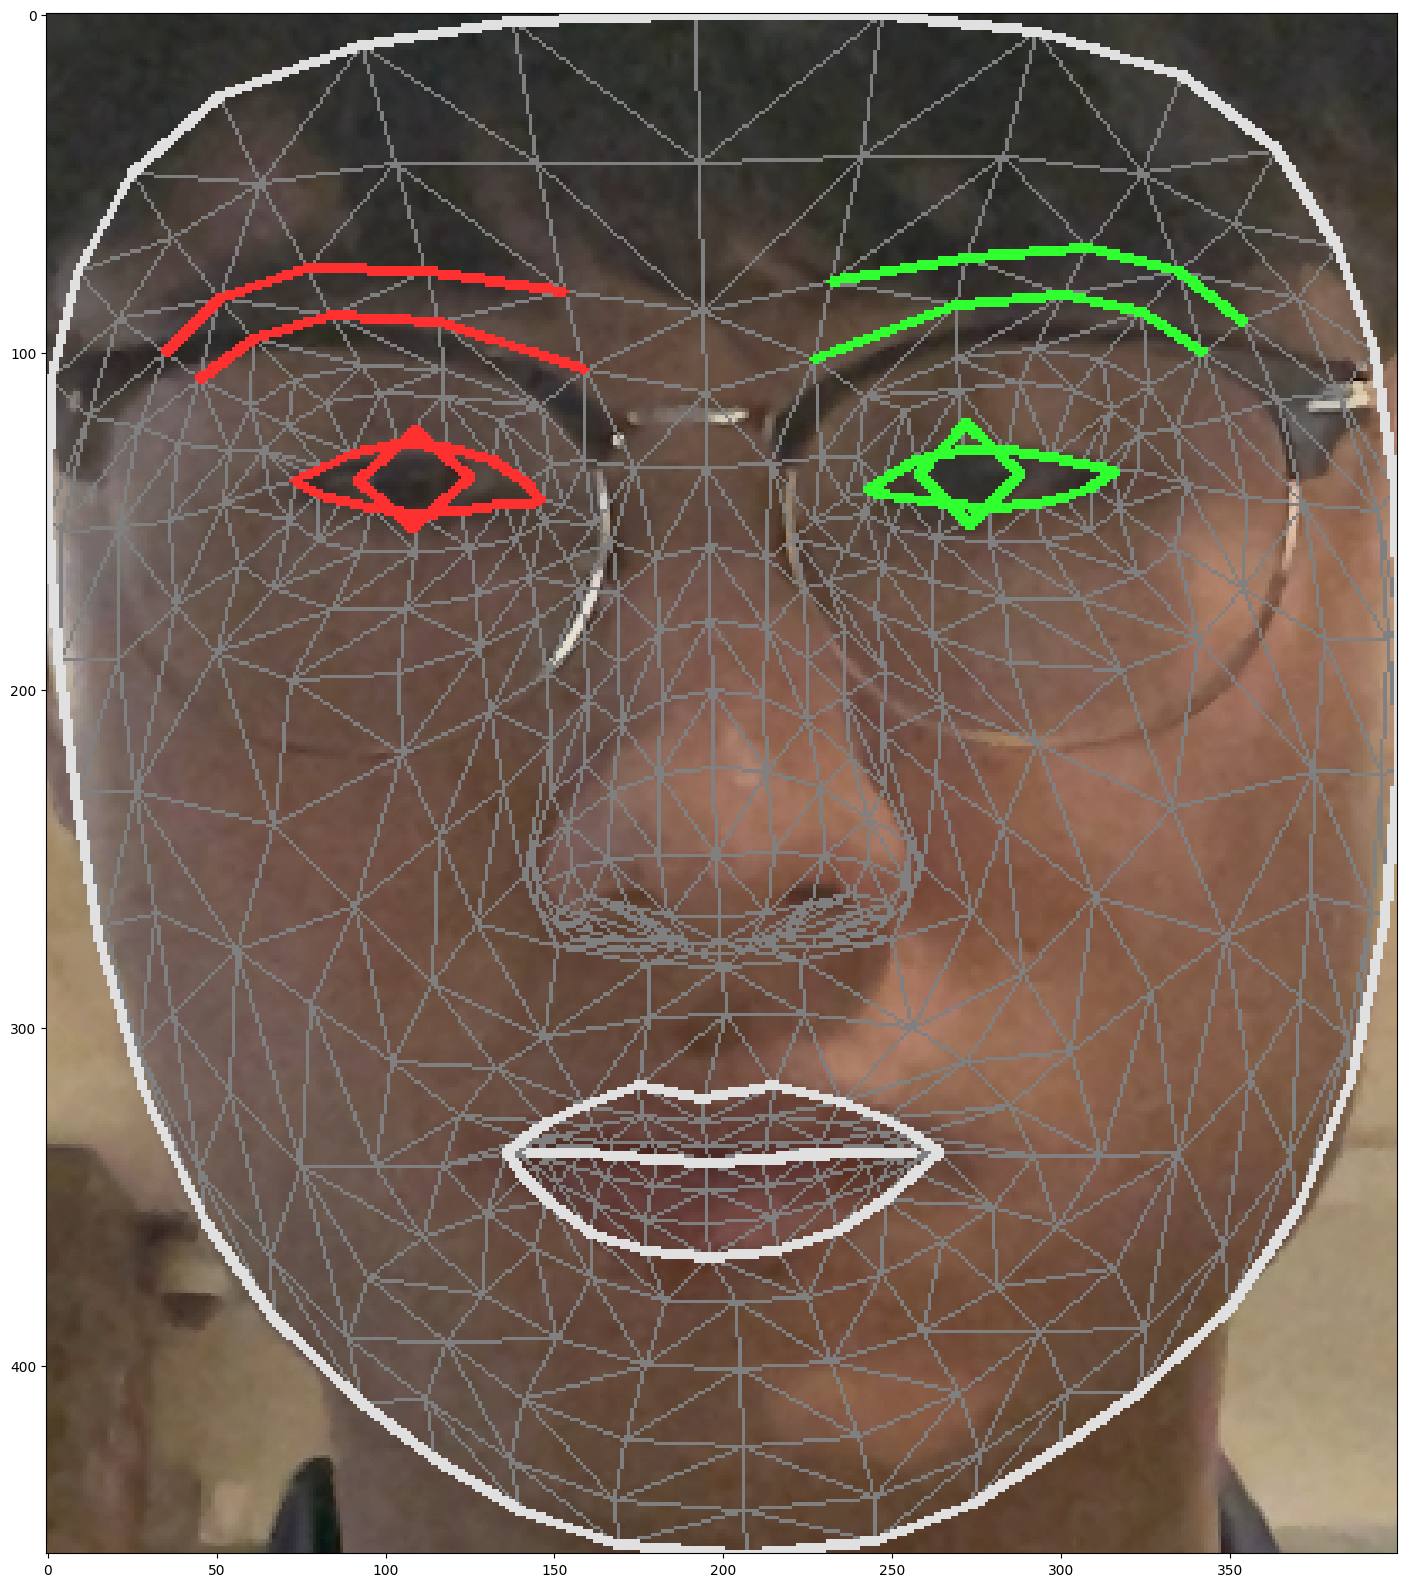

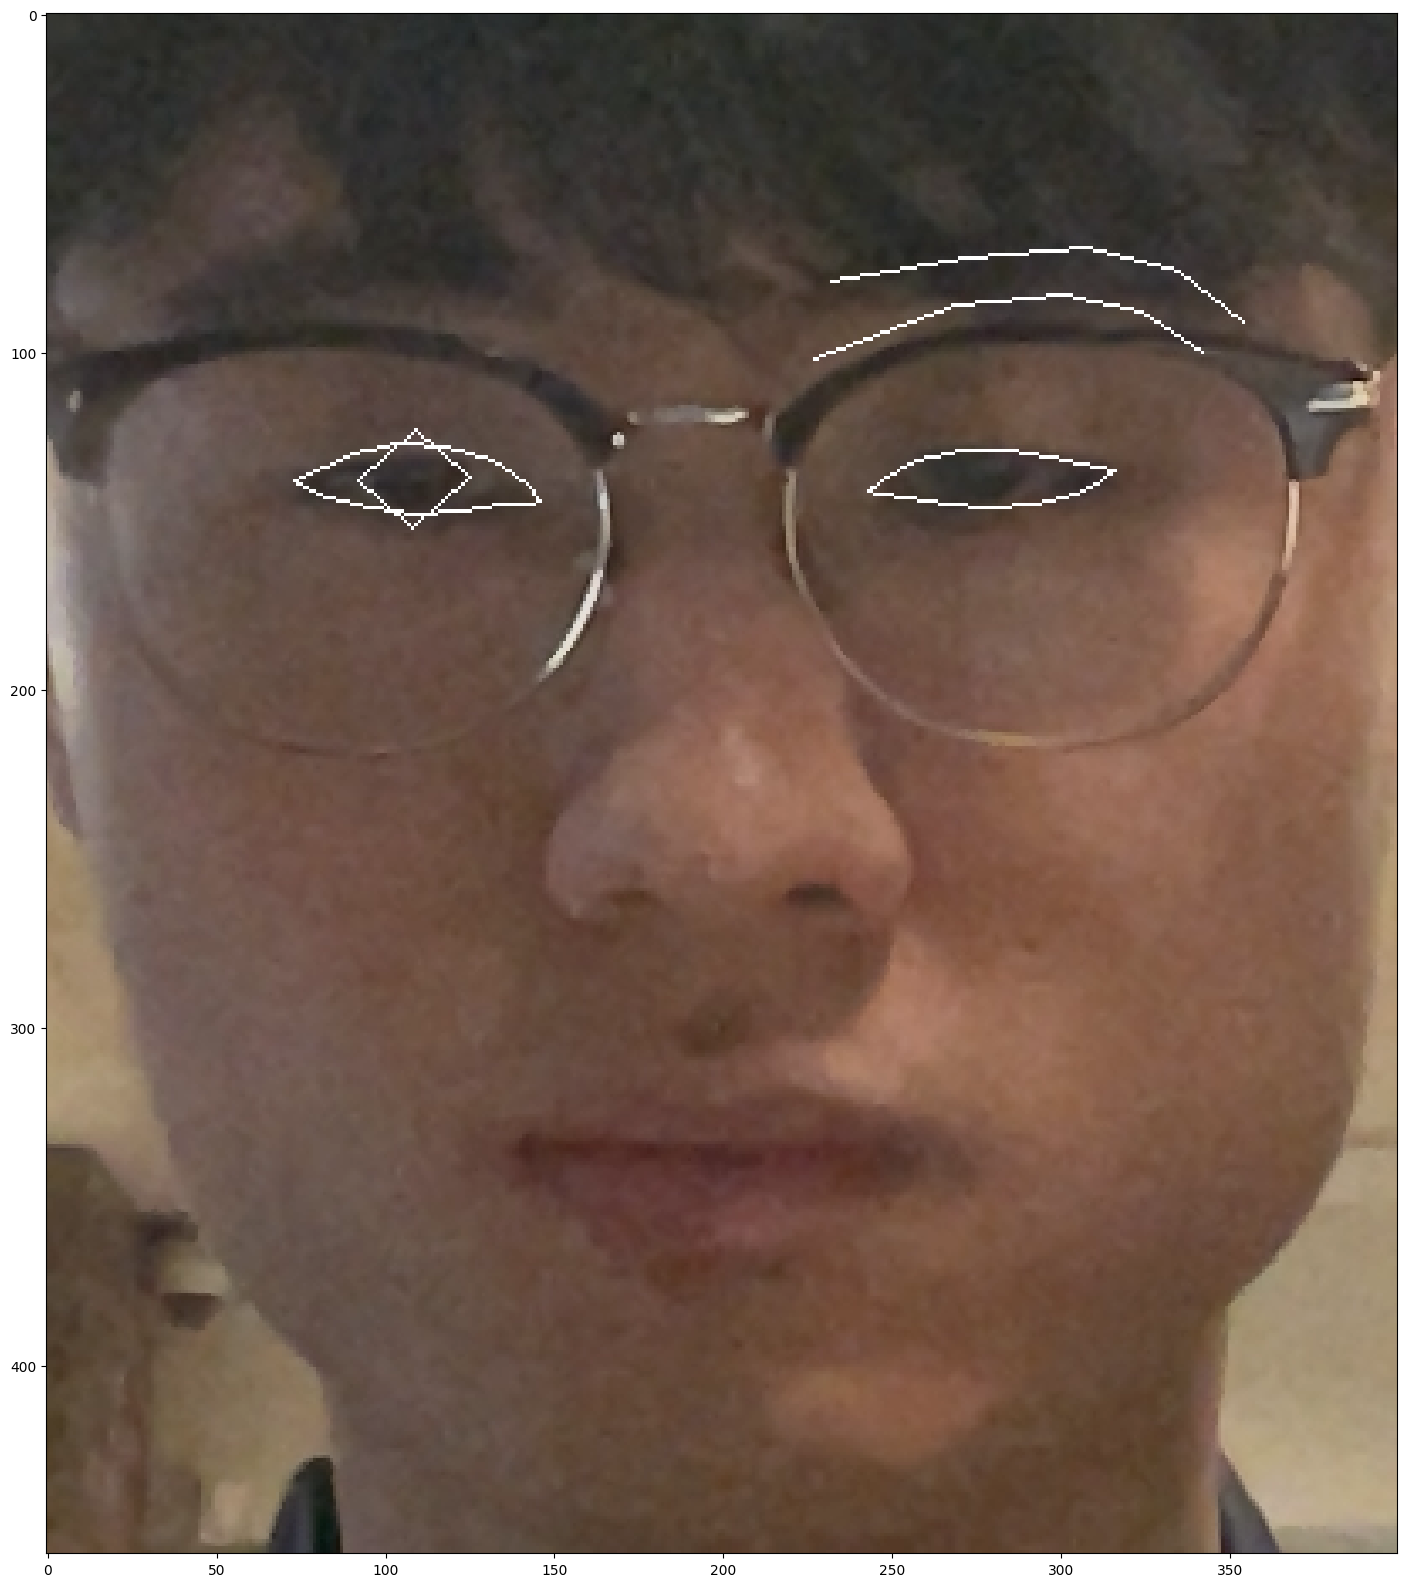

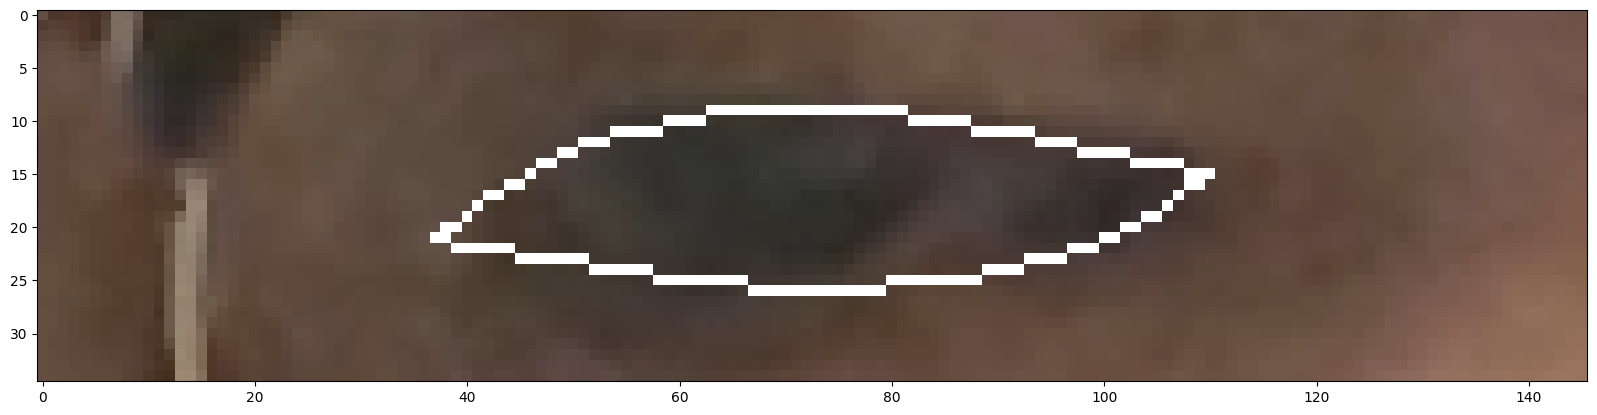

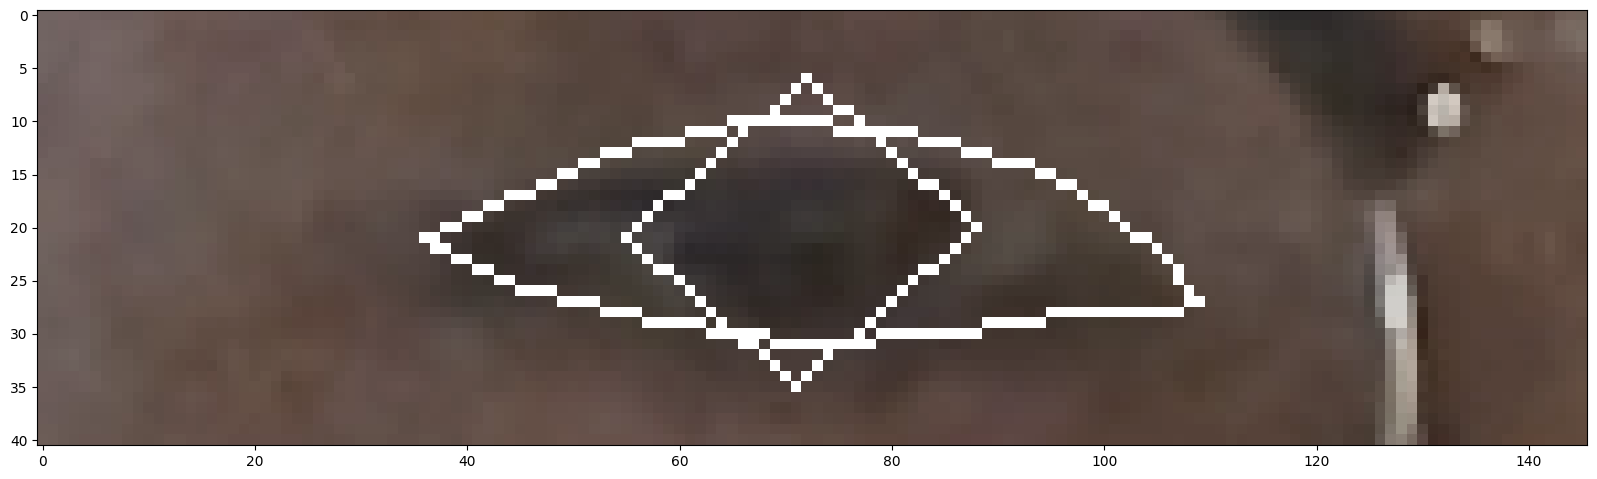

: 

In [206]:
image.flags.writeable = False
results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image.flags.writeable = True

vis_image_1 = image.copy()
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:

        face_landmarks = results.multi_face_landmarks[0]
        face_landmarks_array = np.array(
            list(map(
                lambda kpt : [kpt.x, kpt.y, kpt.z],
                face_landmarks.landmark
            ))
        )

        full_lt_rb = np.array([
            face_landmarks_array.min(axis=0),
            face_landmarks_array.max(axis=0),
        ])[:, :2] * image.shape[-2:-4:-1]
        full_lt_rb = full_lt_rb.flatten().astype(int)

        left_eye_lt_rb = np.array([
            face_landmarks_array[
                np.array(list(mp_face_mesh.FACEMESH_LEFT_EYE)).flatten()
            ].min(axis=0),
            face_landmarks_array[
                np.array(list(mp_face_mesh.FACEMESH_LEFT_EYE)).flatten()
            ].max(axis=0),
        ])[:, :2] * image.shape[-2:-4:-1]
        left_eye_lt_rb = left_eye_lt_rb * 2 - left_eye_lt_rb.mean(axis=0)
        left_eye_lt_rb = left_eye_lt_rb.flatten().astype(int)

        right_eye_lt_rb = np.array([
            face_landmarks_array[
                np.array(list(mp_face_mesh.FACEMESH_RIGHT_EYE)).flatten()
            ].min(axis=0),
            face_landmarks_array[
                np.array(list(mp_face_mesh.FACEMESH_RIGHT_EYE)).flatten()
            ].max(axis=0),
        ])[:, :2] * image.shape[-2:-4:-1]
        right_eye_lt_rb = right_eye_lt_rb * 2 - right_eye_lt_rb.mean(axis=0)
        right_eye_lt_rb = right_eye_lt_rb.flatten().astype(int)

        left_iris_center = face_landmarks_array[
            np.array(list(mp_face_mesh.FACEMESH_LEFT_IRIS)).flatten()
        ].mean(axis=0)
        right_iris_center = face_landmarks_array[
            np.array(list(mp_face_mesh.FACEMESH_RIGHT_IRIS)).flatten()
        ].mean(axis=0)

        vis_image_1 = image.copy()        
        mp_drawing.draw_landmarks(
            image=vis_image_1,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style()
        )
        mp_drawing.draw_landmarks(
            image=vis_image_1,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style()
        )
        mp_drawing.draw_landmarks(
            image=vis_image_1,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style()
        )
        plt_show(vis_image_1[full_lt_rb[1]:full_lt_rb[3], full_lt_rb[0]:full_lt_rb[2], : ])

        vis_image_2 = image.copy()
        vis_image_2 = cv2.polylines(
            vis_image_2,
            (
                face_landmarks_array[
                    np.array(list(mp_face_mesh.FACEMESH_LEFT_EYE)),
                    :2
                ] * np.array([image.shape[1], image.shape[0]])
            ).astype(int),
            isClosed=False,
            color=(255,255,255, 100)
        )
        vis_image_2 = cv2.polylines(
            vis_image_2,
            (
                face_landmarks_array[
                    np.array(list(mp_face_mesh.FACEMESH_RIGHT_EYE)),
                    :2
                ] * np.array([image.shape[1], image.shape[0]])
            ).astype(int),
            isClosed=False,
            color=(255,255,255)
        )
        vis_image_2 = cv2.polylines(
            vis_image_2,
            (
                face_landmarks_array[
                    np.array(list(mp_face_mesh.FACEMESH_LEFT_EYEBROW)),
                    :2
                ] * np.array([image.shape[1], image.shape[0]])
            ).astype(int),
            isClosed=False,
            color=(255,255,255)
        )
        vis_image_2 = cv2.polylines(
            vis_image_2,
            (
                face_landmarks_array[
                    np.array(list(mp_face_mesh.FACEMESH_RIGHT_IRIS)),
                    :2
                ] * np.array([image.shape[1], image.shape[0]])
            ).astype(int),
            isClosed=False,
            color=(255,255,255)
        )


        plt_show(vis_image_2[full_lt_rb[1]:full_lt_rb[3], full_lt_rb[0]:full_lt_rb[2], : ])


        plt_show(vis_image_2[
            left_eye_lt_rb[1]:left_eye_lt_rb[3], left_eye_lt_rb[0]:left_eye_lt_rb[2], : 
        ])


        plt_show(vis_image_2[
            right_eye_lt_rb[1]:right_eye_lt_rb[3], right_eye_lt_rb[0]:right_eye_lt_rb[2], :
        ])

In [216]:
image_shape = np.array(image.shape[-2:-4:-1])
left_iris_center = (face_landmarks_array[
    np.array(list(mp_face_mesh.FACEMESH_LEFT_IRIS)).flatten()
].mean(axis=0)[:2] * image_shape).astype(int)
right_iris_center = (face_landmarks_array[
    np.array(list(mp_face_mesh.FACEMESH_RIGHT_IRIS)).flatten()
].mean(axis=0)[:2] * image_shape).astype(int)

cv2.circle(
    image,
    left_iris_center,
    2,
    (255,255,255)
)

cv2.circle(
    image,
    right_iris_center,
    2,
    (255,255,255)
)

array([[[134, 130, 132],
        [141, 137, 139],
        [147, 142, 145],
        ...,
        [118, 138, 154],
        [117, 134, 150],
        [115, 132, 148]],

       [[136, 131, 131],
        [140, 138, 138],
        [146, 144, 146],
        ...,
        [120, 139, 155],
        [116, 135, 151],
        [114, 133, 149]],

       [[139, 135, 135],
        [139, 137, 137],
        [144, 141, 144],
        ...,
        [121, 140, 156],
        [116, 135, 151],
        [115, 134, 150]],

       ...,

       [[ 56,  72,  95],
        [ 56,  72,  95],
        [ 58,  73,  96],
        ...,
        [ 57,  89, 118],
        [ 58,  88, 117],
        [ 60,  90, 119]],

       [[ 61,  74,  97],
        [ 58,  73,  96],
        [ 58,  73,  96],
        ...,
        [ 81, 114, 147],
        [ 80, 112, 145],
        [ 83, 114, 147]],

       [[ 62,  75,  99],
        [ 60,  75,  99],
        [ 59,  74,  97],
        ...,
        [ 82, 115, 148],
        [ 89, 120, 153],
        [ 91, 122, 155]]

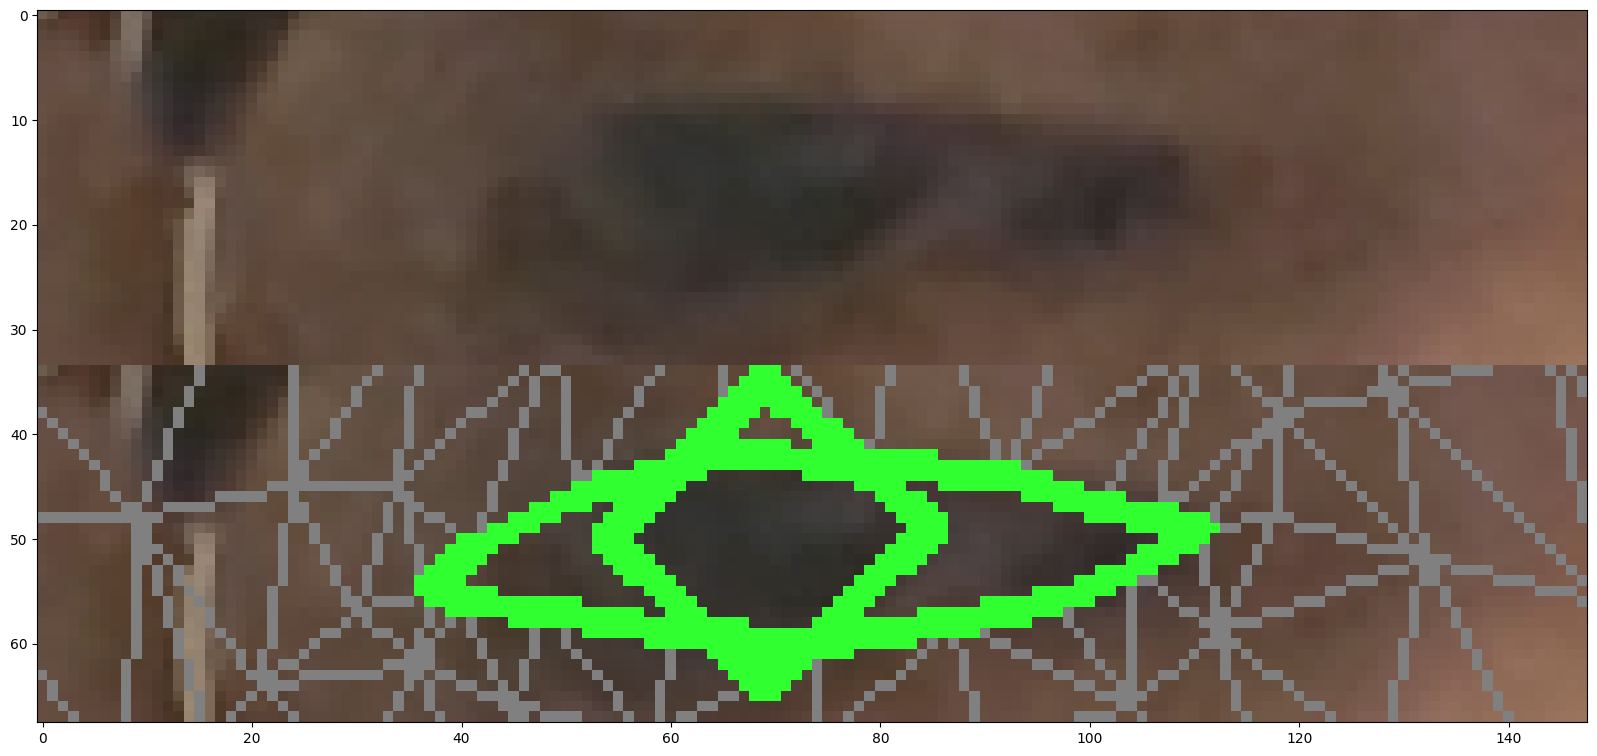

In [205]:

left_eye = np.vstack([
    image[left_eye_lt_rb[1]:left_eye_lt_rb[3], left_eye_lt_rb[0]:left_eye_lt_rb[2], : ],
    vis_image_1[left_eye_lt_rb[1]:left_eye_lt_rb[3], left_eye_lt_rb[0]:left_eye_lt_rb[2], : ]
])
right_eye = np.vstack([
    image[right_eye_lt_rb[1]:right_eye_lt_rb[3], right_eye_lt_rb[0]:right_eye_lt_rb[2], :],
    vis_image_1[right_eye_lt_rb[1]:right_eye_lt_rb[3], right_eye_lt_rb[0]:right_eye_lt_rb[2], :]
])

plt_show(left_eye)

In [196]:
left_eye_lt_rb = np.array([
    face_landmarks_array[
        np.array(list(mp_face_mesh.FACEMESH_LEFT_EYE)).flatten()
    ].min(axis=0),
    face_landmarks_array[
        np.array(list(mp_face_mesh.FACEMESH_LEFT_EYE)).flatten()
    ].max(axis=0),
])[:, :2] * image.shape[-2:-4:-1]
left_eye_lt_rb = left_eye_lt_rb * 2 - left_eye_lt_rb.mean(axis=0)
left_eye_lt_rb = left_eye_lt_rb.flatten().astype(int)

left_eye_lt_rb, left_eye_lt_rb.mean(axis=0), left_eye_lt_rb * 2 - left_eye_lt_rb.mean(axis=0)

(array([[885.99311829, 474.16520119],
        [958.96167755, 491.42788768]]),
 array([922.47739792, 482.79654443]),
 array([[849.50883865, 465.53385794],
        [995.44595718, 500.05923092]]))

In [159]:
fa =  face_landmarks_array[  
    np.array(list(mp_face_mesh.FACEMESH_LEFT_EYEBROW)),
    :2
] * np.array([image.shape[1], image.shape[0]])

fa.shape

(8, 2, 2)

In [70]:
mp_face_mesh.FACEMESH_LEFT_IRIS, mp_face_mesh.FACEMESH_RIGHT_IRIS

(frozenset({(474, 475), (475, 476), (476, 477), (477, 474)}),
 frozenset({(469, 470), (470, 471), (471, 472), (472, 469)}))

In [78]:
FACE_CONNECTIONS = np.array(
    list(mp_face_mesh.FACEMESH_FACE_OVAL) +
    list(mp_face_mesh.FACEMESH_LIPS) +
    list(mp_face_mesh.FACEMESH_IRISES) +
    list(mp_face_mesh.FACEMESH_LEFT_EYE) +
    list(mp_face_mesh.FACEMESH_RIGHT_EYE) +
    list(mp_face_mesh.FACEMESH_LEFT_EYEBROW) +
    list(mp_face_mesh.FACEMESH_RIGHT_EYEBROW)
)

FACE_CONNECTIONS

array([[176, 149],
       [297, 332],
       [150, 136],
       [109,  10],
       [356, 454],
       [ 58, 132],
       [152, 148],
       [361, 288],
       [162,  21],
       [251, 389],
       [132,  93],
       [ 10, 338],
       [389, 356],
       [284, 251],
       [400, 377],
       [136, 172],
       [377, 152],
       [323, 361],
       [ 54, 103],
       [ 21,  54],
       [172,  58],
       [ 67, 109],
       [454, 323],
       [365, 379],
       [379, 378],
       [148, 176],
       [ 93, 234],
       [332, 284],
       [397, 365],
       [338, 297],
       [149, 150],
       [288, 397],
       [234, 127],
       [103,  67],
       [378, 400],
       [127, 162],
       [270, 409],
       [317, 402],
       [ 81,  82],
       [ 91, 181],
       [ 37,   0],
       [ 84,  17],
       [269, 270],
       [321, 375],
       [318, 324],
       [312, 311],
       [415, 308],
       [ 17, 314],
       [ 61, 146],
       [ 78,  95],
       [  0, 267],
       [ 82,  13],
       [314,

In [154]:
def edge_list_2_path(edge_list) :
    tesel = edge_list

    change_occured = True
    while change_occured :
        change_occured = False
        for idx in range(len(tesel)) :
            target_edge = tesel[idx]

            inner_changed = False
            for e in tesel :
                if e != target_edge and len(e) < 3 :
                    edge = e

                    if target_edge[-1] == edge[0] :
                        target_edge.append(edge[-1])
                        tesel.remove(edge)
                        change_occured = True
                        inner_changed = True
                        break

                    if target_edge[0] == edge[-1] :
                        target_edge.insert(0, edge[0])
                        tesel.remove(edge)
                        change_occured = True
                        inner_changed  = True
                        break
            
            if inner_changed :
                break

    change_occured = True
    while change_occured :
        change_occured = False
        for idx in range(len(tesel)) :
            source_path = tesel[idx]

            inner_changed = False
            for target_path in tesel :

                if target_path == source_path :
                    continue

                if source_path[-1] == target_path[-1] :
                    target_path.reverse()
                    source_path += target_path[1:]
                    tesel.remove(target_path)
                    change_occured = True
                    inner_changed = True
                    break

                if source_path[0] == target_path[0] :
                    source_path.reverse()
                    target_path += source_path[1:]
                    tesel.remove(source_path)
                    change_occured = True
                    inner_changed = True
                    break

            if inner_changed :
                break

    return tesel

edge_list = list(map(list, mp_face_mesh.FACEMESH_LEFT_EYE))
edge_list = list(map(list, mp_face_mesh.FACEMESH_LEFT_IRIS))
edge_list = list(map(list, mp_face_mesh.FACEMESH_FACE_OVAL))

edge_list =  FACE_CONNECTIONS = np.array(
    list(mp_face_mesh.FACEMESH_TESSELATION) +
    list(mp_face_mesh.FACEMESH_FACE_OVAL) +
    list(mp_face_mesh.FACEMESH_LIPS) +
    list(mp_face_mesh.FACEMESH_IRISES) +
    list(mp_face_mesh.FACEMESH_LEFT_EYE) +
    list(mp_face_mesh.FACEMESH_RIGHT_EYE) +
    list(mp_face_mesh.FACEMESH_LEFT_EYEBROW) +
    list(mp_face_mesh.FACEMESH_RIGHT_EYEBROW)
).tolist()


edge_list = list(map(list, mp_face_mesh.FACEMESH_TESSELATION))

print(len(edge_list))

face_path_list = edge_list_2_path(edge_list)

face_path_list

2556


[[214,
  207,
  205,
  206,
  36,
  203,
  206,
  216,
  92,
  186,
  92,
  206,
  203,
  36,
  142,
  129,
  64,
  98,
  99,
  98,
  64,
  48,
  64,
  129,
  49,
  209,
  131,
  49,
  131,
  198,
  209,
  217,
  114,
  128,
  233,
  232,
  233,
  245,
  128,
  114,
  217,
  47,
  121,
  232,
  231,
  22,
  231,
  120,
  230,
  229,
  228,
  25,
  130,
  226,
  113,
  46,
  53,
  46,
  63,
  68,
  104,
  105,
  69,
  105,
  104,
  67,
  108,
  151,
  108,
  67,
  103,
  54,
  104,
  103,
  104,
  68,
  71,
  139,
  71,
  68,
  54,
  68,
  21,
  71,
  70,
  139,
  162,
  139,
  156,
  34,
  127,
  139,
  34,
  139,
  70,
  46,
  225,
  30,
  224,
  225,
  53,
  224,
  53,
  63,
  53,
  223,
  52,
  223,
  27,
  28,
  221,
  65,
  221,
  55,
  221,
  190,
  221,
  56,
  190,
  173,
  190,
  56,
  28,
  222,
  27,
  29,
  27,
  159,
  28,
  157,
  56,
  173,
  56,
  221,
  222,
  52,
  222,
  28,
  159,
  158,
  28,
  27,
  160,
  159,
  27,
  223,
  222,
  223,
  29,
  223,
  224,
  30,


In [156]:
LEFT_PATH = edge_list_2_path( np.array(list(mp_face_mesh.FACEMESH_LEFT_IRIS)).tolist() )
RIGHT_PATH = edge_list_2_path( np.array(list(mp_face_mesh.FACEMESH_RIGHT_IRIS)).tolist() )

LEFT_PATH, RIGHT_PATH

([[475, 476, 477, 474, 475]], [[471, 472, 469, 470, 471]])